In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [3]:
# Name of the CSV file
masterdata = Path('Master.csv')

# Read School and Student Data File and store into Pandas DataFrames
master_data = pd.read_csv(masterdata)
master_data.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
master_data.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [5]:
master_data.drop(['birthMonth', 'birthDay', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'retroID', 'bbrefID'], axis=1, inplace=True)
master_data.head()

,playerID,birthYear,birthCountry,birthState,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame
0,aardsda01,1981.0,USA,CO,David,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23
1,aaronha01,1934.0,USA,AL,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03
2,aaronto01,1939.0,USA,AL,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26
3,aasedo01,1954.0,USA,CA,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03
4,abadan01,1972.0,USA,FL,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13


In [6]:
master_data['Name'] = master_data[['nameFirst', 'nameLast']].astype(str).agg(' '.join, axis=1)
print(master_data)

        playerID  birthYear birthCountry birthState nameFirst  nameLast  \
0      aardsda01     1981.0          USA         CO     David   Aardsma   
1      aaronha01     1934.0          USA         AL      Hank     Aaron   
2      aaronto01     1939.0          USA         AL    Tommie     Aaron   
3       aasedo01     1954.0          USA         CA       Don      Aase   
4       abadan01     1972.0          USA         FL      Andy      Abad   
...          ...        ...          ...        ...       ...       ...   
18841   zupofr01     1939.0          USA         CA     Frank      Zupo   
18842  zuvelpa01     1958.0          USA         CA      Paul   Zuvella   
18843  zuverge01     1924.0          USA         MI    George  Zuverink   
18844  zwilldu01     1888.0          USA         MO     Dutch  Zwilling   
18845   zychto01     1990.0          USA         IL      Tony      Zych   

             nameGiven  weight  height bats throws       debut   finalGame  \
0          David Alla

In [7]:
#combine first name and last name together
master_data.drop(['nameFirst', 'nameLast'], axis=1, inplace=True)
master_data.head()

,playerID,birthYear,birthCountry,birthState,nameGiven,weight,height,bats,throws,debut,finalGame,Name
0,aardsda01,1981.0,USA,CO,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,David Aardsma
1,aaronha01,1934.0,USA,AL,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,Hank Aaron
2,aaronto01,1939.0,USA,AL,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,Tommie Aaron
3,aasedo01,1954.0,USA,CA,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,Don Aase
4,abadan01,1972.0,USA,FL,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,Andy Abad


In [8]:
master_data.columns

Index(['playerID', 'birthYear', 'birthCountry', 'birthState', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'Name'],
      dtype='object')

In [9]:
#Rearrange the columns order
master_data = master_data[['playerID', 'Name','nameGiven', 'weight', 'height', 'birthYear', 'birthCountry', 'birthState',
                           'bats', 'throws', 'debut', 'finalGame']]
master_data.head()

,playerID,Name,nameGiven,weight,height,birthYear,birthCountry,birthState,bats,throws,debut,finalGame
0,aardsda01,David Aardsma,David Allan,220.0,75.0,1981.0,USA,CO,R,R,2004-04-06,2015-08-23
1,aaronha01,Hank Aaron,Henry Louis,180.0,72.0,1934.0,USA,AL,R,R,1954-04-13,1976-10-03
2,aaronto01,Tommie Aaron,Tommie Lee,190.0,75.0,1939.0,USA,AL,R,R,1962-04-10,1971-09-26
3,aasedo01,Don Aase,Donald William,190.0,75.0,1954.0,USA,CA,R,R,1977-07-26,1990-10-03
4,abadan01,Andy Abad,Fausto Andres,184.0,73.0,1972.0,USA,FL,L,L,2001-09-10,2006-04-13


There's a couple different excel/csv files that we have to merge together

In [16]:
# Name of the CSV file
additional_data = Path('../src/Resources/SampleData.csv')

# Read School and Student Data File and store into Pandas DataFrames
df = pd.read_csv(additional_data)

# Combine the data into a single dataset.
baseball_complete = pd.merge(df, master_data, how="left", on=["playerID", "playerID"])
baseball_complete.head()

,playerID,birthCountry_x,birthState_x,playertype,activestatus,lat,lon,birthCity,birthDate,bucket_legend,...,nameGiven_y,weight_y,height_y,birthYear,birthCountry_y,birthState_y,bats_y,throws_y,debut_y,finalGame_y
0,aardsda01,USA,CO,AllStar,Inactive,39.550051,-105.782067,Denver,4/6/2004,1875-1884,...,David Allan,220.0,75.0,1981.0,USA,CO,R,R,2004-04-06,2015-08-23
1,aaronha01,USA,AL,AllStar,Inactive,32.318231,-86.902298,Mobile,4/13/1954,1885-1894,...,Henry Louis,180.0,72.0,1934.0,USA,AL,R,R,1954-04-13,1976-10-03
2,aaronto01,USA,AL,AllStar,Inactive,32.318231,-86.902298,Mobile,4/10/1962,1895-1904,...,Tommie Lee,190.0,75.0,1939.0,USA,AL,R,R,1962-04-10,1971-09-26
3,aasedo01,USA,CA,AllStar,Inactive,36.778261,-119.417932,Orange,7/26/1977,1905-1914,...,Donald William,190.0,75.0,1954.0,USA,CA,R,R,1977-07-26,1990-10-03
4,abadan01,USA,FL,AllStar,Inactive,27.664827,-81.515754,Palm Beach,9/10/2001,1915-1924,...,Fausto Andres,184.0,73.0,1972.0,USA,FL,L,L,2001-09-10,2006-04-13


In [17]:
baseball_complete.columns

Index(['playerID', 'birthCountry_x', 'birthState_x', 'playertype',
       'activestatus', 'lat', 'lon', 'birthCity', 'birthDate', 'bucket_legend',
       'nameFirst', 'nameLast', 'nameGiven_x', 'weight_x', 'height_x',
       'bats_x', 'throws_x', 'debut_x', 'finalGame_x', 'retroID', 'bbrefID',
       'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'Name', 'nameGiven_y', 'weight_y', 'height_y', 'birthYear',
       'birthCountry_y', 'birthState_y', 'bats_y', 'throws_y', 'debut_y',
       'finalGame_y'],
      dtype='object')

In [18]:
baseball_complete.drop([ 'birthCountry_x', 'birthState_x', 'birthCity', 'birthDate',
       'nameFirst', 'nameLast', 'nameGiven_x', 'weight_x', 'height_x', 'bucket_legend',
       'bats_x', 'throws_x', 'debut_x', 'finalGame_x', 'retroID', 'bbrefID'], axis=1, inplace=True)

In [19]:
baseball_complete.head()

,playerID,playertype,activestatus,lat,lon,G,AB,R,H,2B,...,nameGiven_y,weight_y,height_y,birthYear,birthCountry_y,birthState_y,bats_y,throws_y,debut_y,finalGame_y
0,aardsda01,AllStar,Inactive,39.550051,-105.782067,11.0,0.0,0.0,0.0,0.0,...,David Allan,220.0,75.0,1981.0,USA,CO,R,R,2004-04-06,2015-08-23
1,aaronha01,AllStar,Inactive,32.318231,-86.902298,122.0,468.0,58.0,131.0,27.0,...,Henry Louis,180.0,72.0,1934.0,USA,AL,R,R,1954-04-13,1976-10-03
2,aaronto01,AllStar,Inactive,32.318231,-86.902298,141.0,334.0,54.0,77.0,20.0,...,Tommie Lee,190.0,75.0,1939.0,USA,AL,R,R,1962-04-10,1971-09-26
3,aasedo01,AllStar,Inactive,36.778261,-119.417932,13.0,0.0,0.0,0.0,0.0,...,Donald William,190.0,75.0,1954.0,USA,CA,R,R,1977-07-26,1990-10-03
4,abadan01,AllStar,Inactive,27.664827,-81.515754,1.0,1.0,0.0,0.0,0.0,...,Fausto Andres,184.0,73.0,1972.0,USA,FL,L,L,2001-09-10,2006-04-13


In [20]:
baseball_complete.columns

Index(['playerID', 'playertype', 'activestatus', 'lat', 'lon', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'Name',
       'nameGiven_y', 'weight_y', 'height_y', 'birthYear', 'birthCountry_y',
       'birthState_y', 'bats_y', 'throws_y', 'debut_y', 'finalGame_y'],
      dtype='object')

In [21]:
baseball_complete = baseball_complete[['playerID', 'Name', 'nameGiven_y','playertype',
                                       'activestatus', 'weight_y', 'height_y', 'birthYear',
                                       'birthState_y','birthCountry_y', 'lat', 'lon', 'debut_y','finalGame_y',
                                       'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
                                       'bats_y', 'throws_y']]
baseball_complete.head()

,playerID,Name,nameGiven_y,playertype,activestatus,weight_y,height_y,birthYear,birthState_y,birthCountry_y,...,2B,3B,HR,RBI,SB,CS,BB,SO,bats_y,throws_y
0,aardsda01,David Aardsma,David Allan,AllStar,Inactive,220.0,75.0,1981.0,CO,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
1,aaronha01,Hank Aaron,Henry Louis,AllStar,Inactive,180.0,72.0,1934.0,AL,USA,...,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,R,R
2,aaronto01,Tommie Aaron,Tommie Lee,AllStar,Inactive,190.0,75.0,1939.0,AL,USA,...,20.0,2.0,8.0,38.0,6.0,0.0,41.0,58.0,R,R
3,aasedo01,Don Aase,Donald William,AllStar,Inactive,190.0,75.0,1954.0,CA,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
4,abadan01,Andy Abad,Fausto Andres,AllStar,Inactive,184.0,73.0,1972.0,FL,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L,L


In [22]:
# Rename column names
baseball_rename = baseball_complete.rename(columns={
    'playerID': 'Player ID',  
    'nameGiven_y': 'Legal Name',
    'playertype': 'Player Type',
    'activestatus': 'Status', 
    'weight_y': 'Weight', 
    'height_y': 'Height', 
    'birthYear': 'Birth Year',
    'birthState_y': 'Birth State',
    'birthCountry_y': 'Birth Country', 
    'lat': 'Latitude', 
    'lon': 'Longitude',
    'bats_y': 'Bats', 
    'throws_y': 'Throws', 
    'debut_y': 'Debut',
    'finalGame_y': 'Final Game'})

baseball_rename.head()

,Player ID,Name,Legal Name,Player Type,Status,Weight,Height,Birth Year,Birth State,Birth Country,...,2B,3B,HR,RBI,SB,CS,BB,SO,Bats,Throws
0,aardsda01,David Aardsma,David Allan,AllStar,Inactive,220.0,75.0,1981.0,CO,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
1,aaronha01,Hank Aaron,Henry Louis,AllStar,Inactive,180.0,72.0,1934.0,AL,USA,...,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,R,R
2,aaronto01,Tommie Aaron,Tommie Lee,AllStar,Inactive,190.0,75.0,1939.0,AL,USA,...,20.0,2.0,8.0,38.0,6.0,0.0,41.0,58.0,R,R
3,aasedo01,Don Aase,Donald William,AllStar,Inactive,190.0,75.0,1954.0,CA,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
4,abadan01,Andy Abad,Fausto Andres,AllStar,Inactive,184.0,73.0,1972.0,FL,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L,L


In [23]:
# Define bins and labels for birth year categories
bins = list(range(1830, 2026, 10))  # Define your own bin edges
labels = ['1830-1839', '1840-1849', '1850-1859', '1860-1869', '1870-1879',
          '1880-1889', '1890-1899', '1900-1909', '1910-1919', '1920-1929',
          '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', 
          '1980-1989', '1990-1999', '2000-2009', '2010-2015']

# Add a new column 'BirthYearCategory' based on birth year bins
baseball_rename['BirthYearCategory'] = pd.cut(baseball_rename['Birth Year'], bins=bins, labels=labels, right=False)

In [24]:
baseball_rename.head()

,Player ID,Name,Legal Name,Player Type,Status,Weight,Height,Birth Year,Birth State,Birth Country,...,3B,HR,RBI,SB,CS,BB,SO,Bats,Throws,BirthYearCategory
0,aardsda01,David Aardsma,David Allan,AllStar,Inactive,220.0,75.0,1981.0,CO,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R,1980-1989
1,aaronha01,Hank Aaron,Henry Louis,AllStar,Inactive,180.0,72.0,1934.0,AL,USA,...,6.0,13.0,69.0,2.0,2.0,28.0,39.0,R,R,1930-1939
2,aaronto01,Tommie Aaron,Tommie Lee,AllStar,Inactive,190.0,75.0,1939.0,AL,USA,...,2.0,8.0,38.0,6.0,0.0,41.0,58.0,R,R,1930-1939
3,aasedo01,Don Aase,Donald William,AllStar,Inactive,190.0,75.0,1954.0,CA,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R,1950-1959
4,abadan01,Andy Abad,Fausto Andres,AllStar,Inactive,184.0,73.0,1972.0,FL,USA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L,L,1970-1979


In [25]:
# List of columns to modify
columns_modify = ['Birth Year']

# Apply the replacement to each specified column
for col in columns_modify:
    # Convert to string first, then replace
    baseball_rename[col] = baseball_rename[col].astype(str).str.replace('.0', '', regex=False)

In [26]:
baseball_rename.columns

Index(['Player ID', 'Name', 'Legal Name', 'Player Type', 'Status', 'Weight',
       'Height', 'Birth Year', 'Birth State', 'Birth Country', 'Latitude',
       'Longitude', 'Debut', 'Final Game', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'Bats', 'Throws',
       'BirthYearCategory'],
      dtype='object')

In [27]:
baseball_rename = baseball_rename[['Player ID', 'Name', 'Legal Name', 'Player Type', 'Status', 'Weight',
       'Height', 'Birth Year','BirthYearCategory', 'Birth State', 'Birth Country', 'Latitude',
       'Longitude', 'Debut', 'Final Game', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'Bats', 'Throws']]
baseball_rename.head()

,Player ID,Name,Legal Name,Player Type,Status,Weight,Height,Birth Year,BirthYearCategory,Birth State,...,2B,3B,HR,RBI,SB,CS,BB,SO,Bats,Throws
0,aardsda01,David Aardsma,David Allan,AllStar,Inactive,220.0,75.0,1981,1980-1989,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
1,aaronha01,Hank Aaron,Henry Louis,AllStar,Inactive,180.0,72.0,1934,1930-1939,AL,...,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,R,R
2,aaronto01,Tommie Aaron,Tommie Lee,AllStar,Inactive,190.0,75.0,1939,1930-1939,AL,...,20.0,2.0,8.0,38.0,6.0,0.0,41.0,58.0,R,R
3,aasedo01,Don Aase,Donald William,AllStar,Inactive,190.0,75.0,1954,1950-1959,CA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
4,abadan01,Andy Abad,Fausto Andres,AllStar,Inactive,184.0,73.0,1972,1970-1979,FL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L,L


In [28]:
Baseball_complete = baseball_rename.rename(columns={'BirthYearCategory': 'Birth Year Category'})
Baseball_complete.head()

,Player ID,Name,Legal Name,Player Type,Status,Weight,Height,Birth Year,Birth Year Category,Birth State,...,2B,3B,HR,RBI,SB,CS,BB,SO,Bats,Throws
0,aardsda01,David Aardsma,David Allan,AllStar,Inactive,220.0,75.0,1981,1980-1989,CO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
1,aaronha01,Hank Aaron,Henry Louis,AllStar,Inactive,180.0,72.0,1934,1930-1939,AL,...,27.0,6.0,13.0,69.0,2.0,2.0,28.0,39.0,R,R
2,aaronto01,Tommie Aaron,Tommie Lee,AllStar,Inactive,190.0,75.0,1939,1930-1939,AL,...,20.0,2.0,8.0,38.0,6.0,0.0,41.0,58.0,R,R
3,aasedo01,Don Aase,Donald William,AllStar,Inactive,190.0,75.0,1954,1950-1959,CA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,R
4,abadan01,Andy Abad,Fausto Andres,AllStar,Inactive,184.0,73.0,1972,1970-1979,FL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L,L


In [38]:
Baseball_complete['Birth Year'].count()

2111

In [39]:
Baseball_complete['Birth Year Category'].count()

2040

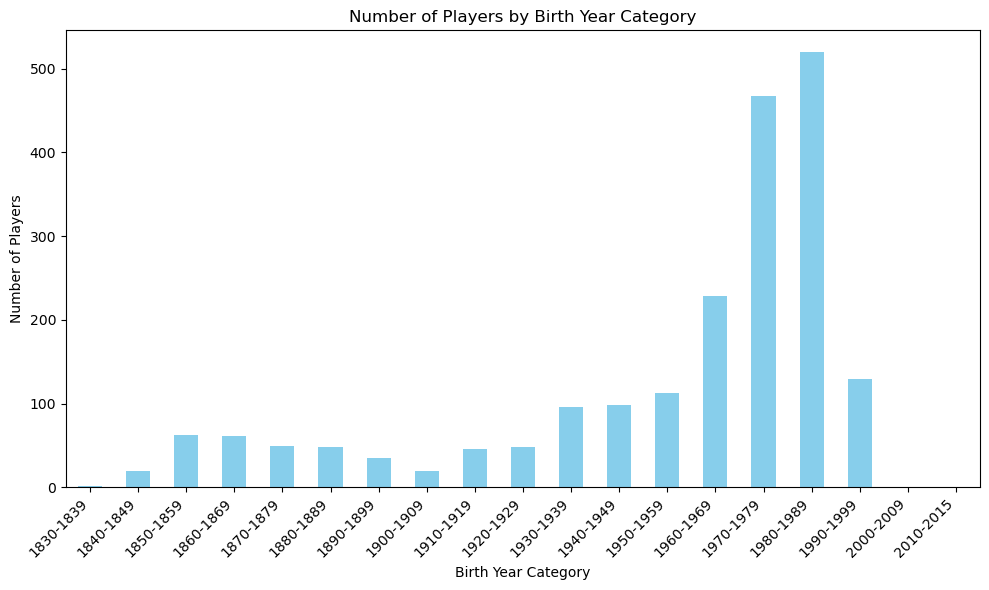

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming baseball_rename is your DataFrame with 'Birth Year' and 'BirthYearCategory' columns

# Count the number of players in each birth year category
birth_year_counts = baseball_rename['BirthYearCategory'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
birth_year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players by Birth Year Category')
plt.xlabel('Birth Year Category')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
Baseball_complete.to_csv("cleanedBaseballData.csv", index=False)

In [23]:
# Convert DataFrame to JSON
json_data = Baseball_complete.to_json(orient='records')

# Save JSON to file
with open('output.json', 'w') as f:
    f.write(json_data)